# 1. Load dataset

#### In this assignment, you will use a turbo.az dataset which is a collection of cars (Mercedes C-class). It contains information about 1328 cars with features of (Sheher, Marka, Model, Buraxilish ili, Ban novu, Reng, Muherrikin hecmi, Muherrikin gucu, Yanacaq novu, Yurush, Suretler qutusu, Oturucu, Yeni, Qiymet, Extra Information, Seller’s comment). You will need to read the data from data file (turboaz.csv) and extract only 3 columns for your model:
X1 - Yurush (mileage)<br>
X2 - Buraxilish ili (model year)<br>
Y - Qiymet (price)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
df = pd.read_csv("turboaz.csv")
df = df[["Yurush","Qiymet","Buraxilish ili"]]
def yurush_to_float(x):
    return float(x.replace(' ', '').replace('km', ''))

def price_to_manat(x):
    if x.split(" ")[1] == "AZN":
        return float(x.split(" ")[0])
    elif x.split(" ")[1] == "$":
        return float(x.split(" ")[0])*1.7
        
df["Qiymet"] = df["Qiymet"].apply(lambda x: price_to_manat(x))
df["Yurush"] = df["Yurush"].apply(lambda x: yurush_to_float(x))
df.head()
def normalize_data(df):
    return (df - df.mean()) / df.std()
df["z_qiymet"] = normalize_data(df["Qiymet"])
df["z_yurush"] = normalize_data(df["Yurush"])
df["z_buraxilish_ili"] = normalize_data(df["Buraxilish ili"])



# 2. Visualize

#### Using matplotlib library (scatter, Axes3D), you are expected to provide 3 visualizations of data:
a) Qiymet (Y) vs Yurush (X1)<br>
b) Qiymet (Y) vs Buraxilish ili (X2)<br>
c) 3D plot of all three values (Y, X1, X2)<br>

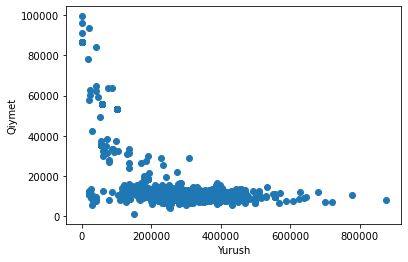

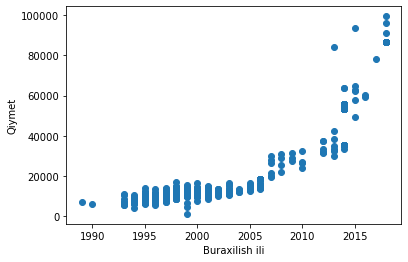

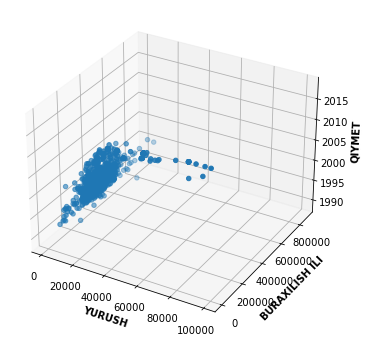

In [3]:
plt.scatter(df["Yurush"],df["Qiymet"])
plt.ylabel("Qiymet")
plt.xlabel("Yurush")
plt.show()
plt.scatter(df["Buraxilish ili"],df["Qiymet"])
plt.ylabel("Qiymet")
plt.xlabel("Buraxilish ili")
plt.show()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(df["Qiymet"], df["Yurush"], df["Buraxilish ili"])
ax.set_xlabel('YURUSH', fontweight ='bold')
ax.set_ylabel('BURAXILISH ILI', fontweight ='bold')
ax.set_zlabel('QIYMET', fontweight ='bold')
plt.show()

# 3. Linear Regresa a mi

#### Implement Linear Regression from scratch (using numpy)
a) Calculate cost function. Implement a function which returns cost given true y values, x values and parameters (w).<br>
<div>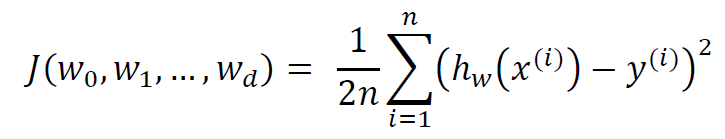</div>

In [4]:
def compute_cost(X,y,w,b):
    m,n= X.shape
    cost = 0
    # Loop over each training example
    for i in range(m): 
        f_wb = np.dot(X[i],w) + b
        cost+= (f_wb-y[i])**2
    total_cost = cost/2*m
    return total_cost

In [5]:
X = df[["z_yurush","z_buraxilish_ili"]].to_numpy()
y = df["z_qiymet"].to_numpy()
w = np.array([1,3])
b = 0
print(compute_cost(X,y,w,b))

3001748.51817623


b) Normalize data using Z score normalization (Recommended).<br>

c) Implement gradient descent algorithm to minimize the cost function.
- Assign initial values of W=(w0, w1, w2) to zero or choose randomly
- Learning rate: alpha=0.001, you can change it in different experiments
- Number of iterations: 10000 or you can stop it when two sequential values are too close.
- Calculate values of parameters using gradient descent formula.
<div>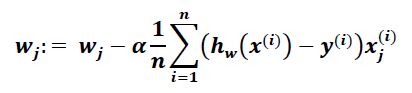</div>

In [6]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros(w.shape)
    for i in range(m):
        f_wb = np.dot(X[i],w) + b
        err_i = f_wb - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i*X[i,j]
    dj_dw = dj_dw / m
    return dj_dw

In [7]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, alpha and gradient
        w_in = w_in - alpha * dj_dw                     
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in,J_history #return w and J,w history for graphing

In [8]:
iterations = 3000
alpha = 0.01

w,J_history = gradient_descent(X ,y, w, b, 
                                   compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost 2959565.18   
Iteration  300: Cost 338495.51   
Iteration  600: Cost 198649.34   
Iteration  900: Cost 188059.85   
Iteration 1200: Cost 187257.65   
Iteration 1500: Cost 187196.88   
Iteration 1800: Cost 187192.28   
Iteration 2100: Cost 187191.93   
Iteration 2400: Cost 187191.90   
Iteration 2700: Cost 187191.90   
Iteration 2999: Cost 187191.90   


d) Plot graph of Cost function and describe how it changes over iterations.

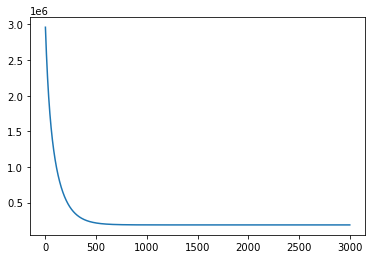

In [9]:
plt.plot(J_history)

e) Plot points of Y (Qiymet) vs X1 (Buraxilish ili) and draw a line of predictions made with parameters you got from gradient descent.

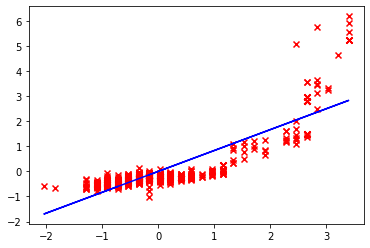

In [10]:
m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w[1] * X[i,1] + b

plt.plot(X[:,1], predicted, c = "b")


# Create a scatter plot of the data. 
plt.scatter(X[:,1], y, marker='x', c='r') 



f) Plot points of Y (Qiymet) vs X2 (Yurush) and draw a line of predictions made with parameters you got from gradient descent.

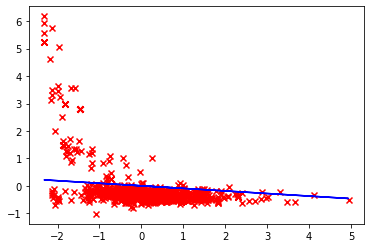

In [11]:
m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w[0] * X[i,0] + b

plt.plot(X[:,0], predicted, c = "b")


# Create a scatter plot of the data. 
plt.scatter(X[:,0], y, marker='x', c='r')

g) Plot 3D graph of points of Y (Qiymet), X1, X2 and predicted Y (Qiymet) using the same X1 and X2. It should look like this (blue points are true values, red points are predicted values):

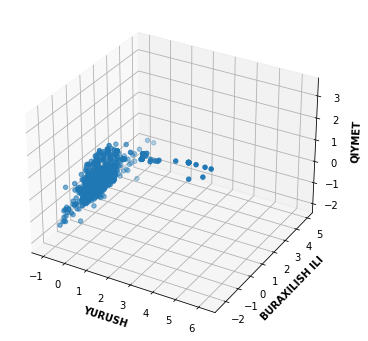

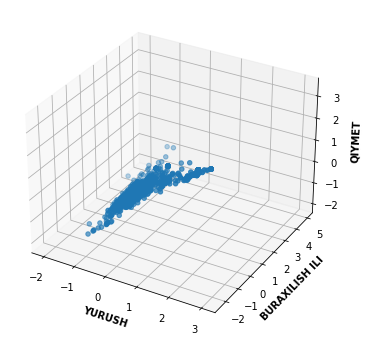

In [12]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(df["z_qiymet"], df["z_yurush"], df["z_buraxilish_ili"])
ax.set_xlabel('YURUSH', fontweight ='bold')
ax.set_ylabel('BURAXILISH ILI', fontweight ='bold')
ax.set_zlabel('QIYMET', fontweight ='bold')
plt.show()
m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w[1] * X[i,1] + w[0] * X[i,0] + b
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(predicted, df["z_yurush"], df["z_buraxilish_ili"])
ax.set_xlabel('YURUSH', fontweight ='bold')
ax.set_ylabel('BURAXILISH ILI', fontweight ='bold')
ax.set_zlabel('QIYMET', fontweight ='bold')
plt.show()

h) Given are two new cars which are not in the dataset. Predict the prices of these cars by using your parameters and compare your predictions with the actual prices.
- Car 1 {Yurush: 240000, Buraxilish ili: 2000, Qiymet: 11500}
- Car 2 {Yurush: 415558, Buraxilish ili: 1996, Qiymet: 8800}

# 4. Linear Regression using library

#### Use a library to fit perform linear regression on the data. You should use the same features (Yurush and Buraxilish ili) as input to this model and perform the same testing (3(h)) as above (using scikit-learn library is recommended).